# DSC 630 

### Assignment 8.2: Time Series Modeling

**Author:** Kimberly Cable<br>
**Date:** Oct 22, 2022

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
import warnings

warnings.filterwarnings('ignore')

This data gives the total monthly retail sales in the US from January 1992 until June 2021. With this dataset, complete the following steps:

In [2]:
# Read datasets
retail_df = pd.read_csv("data/us_retail_sales.csv")
retail_df.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,1992,146925,147223,146805,148032,149010,149800,150761.0,151067.0,152588.0,153521.0,153583.0,155614.0
1,1993,157555,156266,154752,158979,160605,160127,162816.0,162506.0,163258.0,164685.0,166594.0,168161.0
2,1994,167518,169649,172766,173106,172329,174241,174781.0,177295.0,178787.0,180561.0,180703.0,181524.0
3,1995,182413,179488,181013,181686,183536,186081,185431.0,186806.0,187366.0,186565.0,189055.0,190774.0
4,1996,189135,192266,194029,194744,196205,196136,196187.0,196218.0,198859.0,200509.0,200174.0,201284.0


In [3]:
retail_df.tail()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
25,2017,416081,415503,414620,416889,414540,416505,416744.0,417179.0,426501.0,426933.0,431158.0,433282.0
26,2018,432148,434106,433232,435610,439996,438191,440703.0,439278.0,438985.0,444038.0,445242.0,434803.0
27,2019,440751,439996,447167,448709,449552,450927,454012.0,456500.0,452849.0,455486.0,457658.0,458055.0
28,2020,460586,459610,434281,379892,444631,476343,481627.0,483716.0,493327.0,493991.0,488652.0,484782.0
29,2021,520162,504458,559871,562269,548987,550782,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
retail_df.shape

(30, 13)

In [5]:
retail_df.describe()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,29.000000,29.000000,29.000000,29.00000,29.000000,29.000000
mean,2006.500000,304803.833333,305200.900000,307533.566667,306719.600000,309205.633333,311406.966667,304375.448276,305451.965517,306078.206897,307310.62069,307794.896552,308099.620690
std,8.803408,97687.399232,96682.043053,100002.422696,98207.161171,99541.010078,101057.212178,92471.103673,92504.808195,93008.417392,92836.64419,92702.551770,91784.061634
min,1992.000000,146925.000000,147223.000000,146805.000000,148032.000000,149010.000000,149800.000000,150761.000000,151067.000000,152588.000000,153521.00000,153583.000000,155614.000000
25%,1999.250000,228856.750000,231470.750000,233019.000000,233235.500000,234976.500000,235967.250000,233948.000000,236566.000000,237481.000000,237553.00000,240544.000000,245485.000000
50%,2006.500000,303486.000000,304592.500000,308655.500000,311233.500000,308690.000000,312957.000000,313520.000000,310046.000000,310673.000000,310479.00000,306675.000000,308413.000000
75%,2013.750000,371527.000000,377008.500000,379221.000000,376797.500000,382698.250000,383839.750000,373554.000000,372489.000000,372505.000000,373663.00000,373914.000000,377032.000000
max,2021.000000,520162.000000,504458.000000,559871.000000,562269.000000,548987.000000,550782.000000,481627.000000,483716.000000,493327.000000,493991.00000,488652.000000,484782.000000


**1. Plot the data with proper labeling and make some observations on the graph.**

In [6]:
# Reshape data to a wide format
retail_wide_df = pd.melt(retail_df, id_vars = 'YEAR', value_vars = retail_df.iloc[:, 1:], var_name = 'Month', value_name = 'Sales')
retail_wide_df.head()

,YEAR,Month,Sales
0,1992,JAN,146925.0
1,1993,JAN,157555.0
2,1994,JAN,167518.0
3,1995,JAN,182413.0
4,1996,JAN,189135.0


In [7]:
# Convert Month and Year to a date
retail_wide_df['Date'] = pd.to_datetime(dict(year = retail_wide_df.YEAR, 
                                             month = pd.to_datetime(retail_wide_df.Month, format='%b').dt.month, 
                                             day = 1))
retail_wide_df.head()

,YEAR,Month,Sales,Date
0,1992,JAN,146925.0,1992-01-01
1,1993,JAN,157555.0,1993-01-01
2,1994,JAN,167518.0,1994-01-01
3,1995,JAN,182413.0,1995-01-01
4,1996,JAN,189135.0,1996-01-01


In [8]:
# Group Sales by Date
sales_df = retail_wide_df.groupby('Date')['Sales'].sum().to_frame("Sales").reset_index()
sales_df = sales_df[sales_df['Sales'] > 0]
sales_df

,Date,Sales
0,1992-01-01,146925.0
1,1992-02-01,147223.0
2,1992-03-01,146805.0
3,1992-04-01,148032.0
4,1992-05-01,149010.0
...,...,...
349,2021-02-01,504458.0
350,2021-03-01,559871.0
351,2021-04-01,562269.0
352,2021-05-01,548987.0


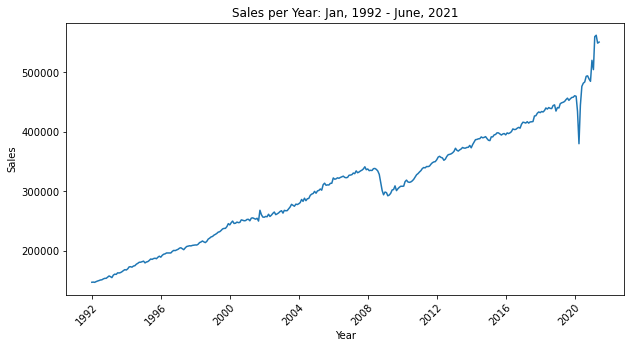

In [9]:
# PLot Sales over time
fig, ax = plt.subplots(figsize = (10, 5))

plt.plot(sales_df['Date'], sales_df['Sales'])
plt.xticks(rotation = 45, ha = 'right', rotation_mode = 'anchor')
plt.ticklabel_format(axis = 'y', style='plain')
plt.title("Sales per Year: Jan, 1992 - June, 2021")
plt.ylabel("Sales")
plt.xlabel("Year")

plt.show()

**Observations:** It looks like sales is trending upwards.  There is a drop between 2008 - 2009 and in 2020.

**Decompose the data**

In [10]:
import statsmodels.api as sm

# graphs to show seasonal_decompose
def seasonal_decompose (y):
    decomposition = sm.tsa.seasonal_decompose(y, model='additive',extrapolate_trend='freq')
    fig = decomposition.plot()
    fig.set_size_inches(14,7)
    plt.show()

In [11]:
# create new dataset with date as the index
model_sales_df = sales_df.copy()
model_sales_df = model_sales_df.set_index('Date')
model_sales_df.head()

,Sales
Date,
1992-01-01,146925.0
1992-02-01,147223.0
1992-03-01,146805.0
1992-04-01,148032.0
1992-05-01,149010.0


In [12]:
# Set y to the Sales
y = model_sales_df['Sales']

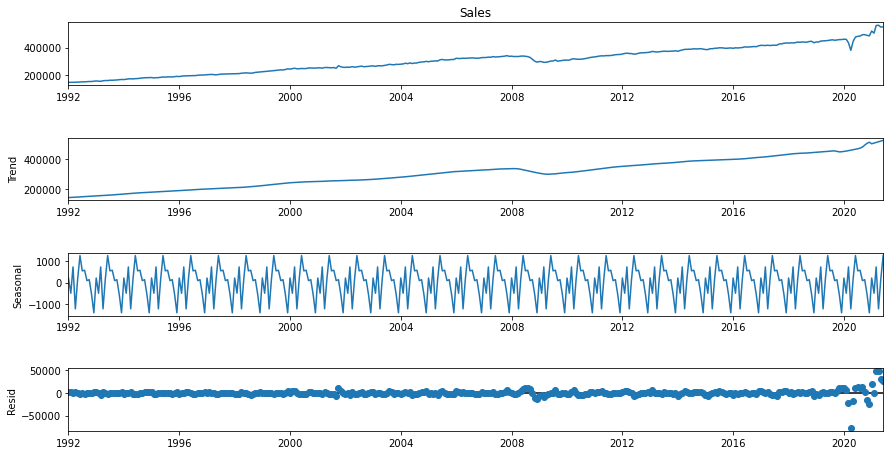

In [13]:
# run a seasonal decomposition
seasonal_decompose(y)

**Observations:** The sales has an overall increasing trend and quarterly seasonality.

**Check for Stationarity**

In [14]:
# plot for Rolling Statistic for testing Stationarity
def test_stationarity(timeseries, title):
    
    #Determing rolling statistics
    rolmean = pd.Series(timeseries).rolling(window = 12).mean() 
    rolstd = pd.Series(timeseries).rolling(window = 12).std()
    
    fig, ax = plt.subplots(figsize = (16, 4))
    ax.plot(timeseries, label= title)
    ax.plot(rolmean, label='rolling mean');
    ax.plot(rolstd, label='rolling std (x10)');
    ax.legend()

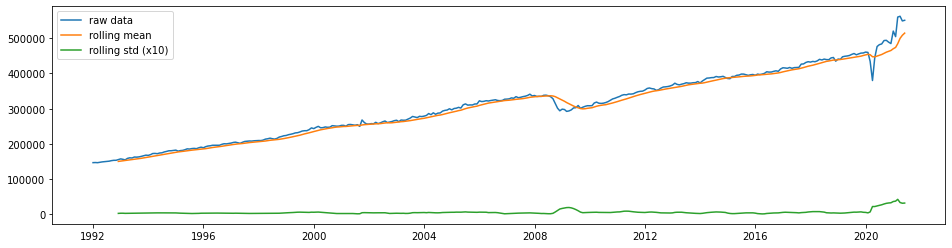

In [15]:
# See if Sales is stationary
pd.options.display.float_format = '{:.8f}'.format
test_stationarity(y, 'raw data')

In [16]:
#Augmented Dickey-Fuller Test
from statsmodels.tsa.stattools import adfuller

def ADF_test(timeseries, dataDesc):
    print(f' > Is the {dataDesc} stationary ?')
    dftest = adfuller(timeseries.dropna(), autolag='AIC')
    print('Test statistic = {:.3f}'.format(dftest[0]))
    print('P-value = {:.3f}'.format(dftest[1]))
    print('Critical values :')
    for k, v in dftest[4].items():
        print('\t{}: {} - The data is {} stationary with {}% confidence'.format(k, v, 'not' if v < dftest[0] else '', 100 - int(k[:-1])))

In [17]:
ADF_test(y,'raw data')

 > Is the raw data stationary ?
Test statistic = 1.449
P-value = 0.997
Critical values :
	1%: -3.449673193310592 - The data is not stationary with 99% confidence
	5%: -2.8700533746644323 - The data is not stationary with 95% confidence
	10%: -2.5713055939491403 - The data is not stationary with 90% confidence


**Observations:** The data is not stationary

**Make the Data Stationary**

 > Is the de-trended data stationary ?
Test statistic = -6.801
P-value = 0.000
Critical values :
	1%: -3.449673193310592 - The data is  stationary with 99% confidence
	5%: -2.8700533746644323 - The data is  stationary with 95% confidence
	10%: -2.5713055939491403 - The data is  stationary with 90% confidence


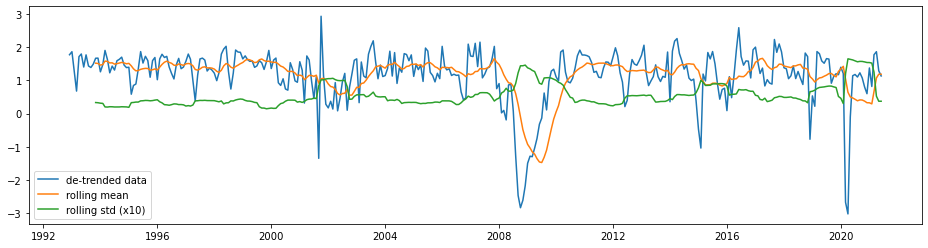

In [18]:
# Detrend the data
y_detrend =  (y - y.rolling(window = 12).mean()) / y.rolling(window = 12).std()

test_stationarity(y_detrend, 'de-trended data')
ADF_test(y_detrend, 'de-trended data')

**2. Split this data into a training and test set. Use the last year of data (July 2020 – June 2021) of data as your test set and the rest as your training set.**

In [19]:
# Training
y_train = y.loc[:'2019-06-30']
y_train.shape

(330,)

In [20]:
# Test
y_test = y.loc['2020-07-01':]
y_test.shape

(12,)

In [21]:
# Calculate number of days to predict
predict_date = len(y) - len(y[:'2020-07-01']) # the number of data points for the test set

**3. Use the training set to build a predictive model for the monthly retail sales.**

In [22]:
def sarima_grid_search(y, seasonal_period):
    p = d = q = range(0, 2)
    pdq = list(itertools.product(p, d, q))
    seasonal_pdq = [(x[0], x[1], x[2], seasonal_period) for x in list(itertools.product(p, d, q))]
    
    mini = float('+inf')
    
    
    for param in pdq:
        for param_seasonal in seasonal_pdq:
            try:
                mod = sm.tsa.statespace.SARIMAX(y,
                                                order=param,
                                                seasonal_order=param_seasonal,
                                                enforce_stationarity=False,
                                                enforce_invertibility=False)

                results = mod.fit()
                
                if results.aic < mini:
                    mini = results.aic
                    param_mini = param
                    param_seasonal_mini = param_seasonal

#                 print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
            except:
                continue
    print('The set of parameters with the minimum AIC is: SARIMA{}x{} - AIC:{}'.format(param_mini, param_seasonal_mini, mini))

In [23]:
# Find the best best hyperparameters for a quarterly season use an AIC evaluation metric. 
# The lowest WIC value has the best combination
sarima_grid_search(y, 4)

C:\Users\Osgiliath\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Osgiliath\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Osgiliath\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Osgiliath\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Osgiliath\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: 

The set of parameters with the minimum AIC is: SARIMA(0, 1, 1)x(0, 0, 1, 4) - AIC:7131.699165530899


In [33]:
#SARIMA(0, 1, 1)x(0, 0, 1, 4)
mod = sm.tsa.statespace.SARIMAX(y,
                                order = (0, 1, 1),
                                seasonal_order = (0, 0, 1, 4))
results = mod.fit(method = 'powell')
print(results.summary().tables[1])

C:\Users\Osgiliath\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Osgiliath\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Optimization terminated successfully.
         Current function value: 10.232153
         Iterations: 2
         Function evaluations: 65
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0342      0.011     -3.194      0.001      -0.055      -0.013
ma.S.L4        0.0130      0.053      0.246      0.806      -0.090       0.116
sigma2      4.789e+07   2.36e-10   2.03e+17      0.000    4.79e+07    4.79e+07


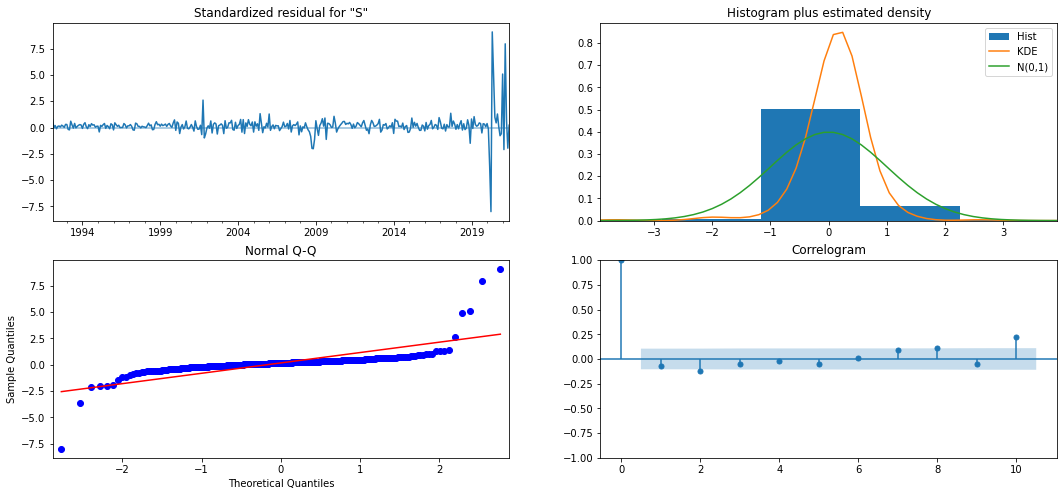

In [34]:
results.plot_diagnostics(figsize = (18, 8))
plt.show()

Looking at the plots, we see that the the residuals are not showing any seasonality. The KDE line follows a normal distribution. The ordered distribution of residuals is following a linear trend. The autocorrelation is low. Therefore, the model is well-fit and suitable for the dataset.

**4. Use the model to predict the monthly retail sales on the last year of data.**

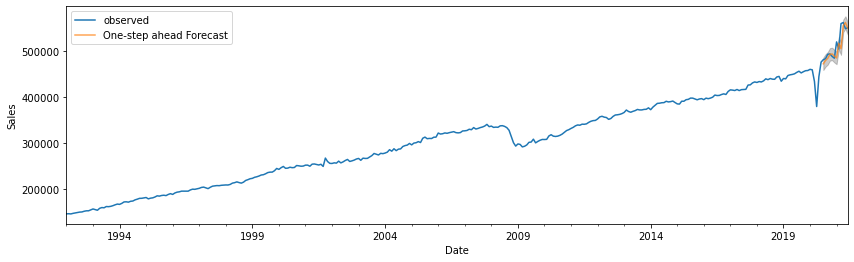

In [35]:
pred = model.get_prediction(start = pd.to_datetime('2020-07-01'), dynamic = False)
pred_ci = pred.conf_int()
ax = y.plot(label = 'observed')
pred.predicted_mean.plot(ax = ax, label = 'One-step ahead Forecast', alpha = .7, figsize = (14, 4))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color = 'k', alpha = .2)
ax.set_xlabel('Date')
ax.set_ylabel('Sales')
plt.legend()
plt.show()

**5. Report the RMSE of the model predictions on the test set.**

In [31]:
y_forecasted = pred.predicted_mean
y_truth = y['2020-07-01':]

mse = ((y_forecasted - y_truth) ** 2).mean()

print('The Mean Squared Error is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error is 398644467.1
The Root Mean Squared Error is 19966.08
